# Predicting Car Prices, KNN

The data set we will be working with contains information on various cars. For each car we have information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more. You can read more about the data set [here](https://archive.ics.uci.edu/ml/datasets/automobile) and can download it directly from [here](https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data).

We're going to be predicting car prices using the KNearestNeighbors algorithm. First lets load in the dataset and some packages.

Additionally the webpage has provided us a description of our variables which I will paste here:


1. symboling: -3, -2, -1, 0, 1, 2, 3.
2. normalized-losses: continuous from 65 to 256.
3. make: alfa-romero, audi, bmw, chevrolet, dodge, honda, isuzu, jaguar, mazda, mercedes-benz, mercury, mitsubishi, nissan, peugot, plymouth, porsche, renault, saab, subaru, toyota, volkswagen, volvo

4. fuel-type: diesel, gas.
5. aspiration: std, turbo.
6. num-of-doors: four, two.
7. body-style: hardtop, wagon, sedan, hatchback, convertible.
8. drive-wheels: 4wd, fwd, rwd.
9. engine-location: front, rear.
10. wheel-base: continuous from 86.6 120.9.
11. length: continuous from 141.1 to 208.1.
12. width: continuous from 60.3 to 72.3.
13. height: continuous from 47.8 to 59.8.
14. curb-weight: continuous from 1488 to 4066.
15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. num-of-cylinders: eight, five, four, six, three, twelve, two.
17. engine-size: continuous from 61 to 326.
18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. bore: continuous from 2.54 to 3.94.
20. stroke: continuous from 2.07 to 4.17.
21. compression-ratio: continuous from 7 to 23.
22. horsepower: continuous from 48 to 288.
23. peak-rpm: continuous from 4150 to 6600.
24. city-mpg: continuous from 13 to 49.
25. highway-mpg: continuous from 16 to 54.
26. price: continuous from 5118 to 45400.


In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

pd.set_option('display.max_columns', None)

In [2]:
#The dataset doesn't have the columns for us so we need to define them ourselves.

cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm',
        'city-mpg', 'highway-mpg', 'price']

cols = [c.replace('-', '_') for c in cols]

cars = pd.read_csv("D:/Library/datasci/datasets/imports-85.data", names = cols )

In [3]:
cars.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_rate,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


# Missing value treatment
Lets now begin to process our missing values. We will end up doing this column by column so lets take a look at them. From the header we see that some of our missing values are coded with a '?' instead of truly missing as a NAN object. This can obstruct the column data types, for example it can make a float coded as an object even though it is a numeric column. This can be problematic for cleaning data.

# Replacing "?" with NAN

First things first lets replace all of our '?' with np.nan instead. Thankfully this is quite easy.

In [4]:
cars = cars.replace('?',np.nan)
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num_of_doors       203 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_of_cylinders   205 non-null    object 
 16  engine_size        205 non

# Assigning proper data type.
We see above that although we have replaced the missing values the data types do not automatically adjust. We're going to have to look at the columns and manually fix them.

In [5]:
numeric = ['normalized_losses', 'horsepower','bore', 'stroke', 'peak_rpm', 'price']
cars[numeric] = cars[numeric].astype(float)


In [6]:
cars.describe().round(3)

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_rate,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,205.000,164.000,205.000,205.000,205.000,205.000,205.000,205.000,201.000,201.000,205.000,203.000,203.000,205.000,205.000,201.000
mean,0.834,122.000,98.757,174.049,65.908,53.725,2555.566,126.907,3.330,3.255,10.143,104.256,5125.369,25.220,30.751,13207.129
std,1.245,35.442,6.022,12.337,2.145,2.444,520.680,41.643,0.274,0.317,3.972,39.714,479.335,6.542,6.886,7947.066
min,-2.000,65.000,86.600,141.100,60.300,47.800,1488.000,61.000,2.540,2.070,7.000,48.000,4150.000,13.000,16.000,5118.000
25%,0.000,94.000,94.500,166.300,64.100,52.000,2145.000,97.000,3.150,3.110,8.600,70.000,4800.000,19.000,25.000,7775.000
50%,1.000,115.000,97.000,173.200,65.500,54.100,2414.000,120.000,3.310,3.290,9.000,95.000,5200.000,24.000,30.000,10295.000
75%,2.000,150.000,102.400,183.100,66.900,55.500,2935.000,141.000,3.590,3.410,9.400,116.000,5500.000,30.000,34.000,16500.000
max,3.000,256.000,120.900,208.100,72.300,59.800,4066.000,326.000,3.940,4.170,23.000,288.000,6600.000,49.000,54.000,45400.000


In [7]:
cars.describe(include = ["O"])

,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,engine_type,num_of_cylinders,fuel_system
count,205,205,205,203,205,205,205,205,205,205
unique,22,2,2,2,5,3,2,7,7,8
top,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,32,185,168,114,96,120,202,148,159,94


Lets take a quick look at the target variable now that we've done some initial cleaning.v

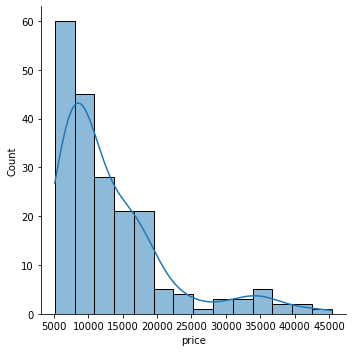

In [8]:
sns.displot(cars["price"], kind = "hist", kde = "True")

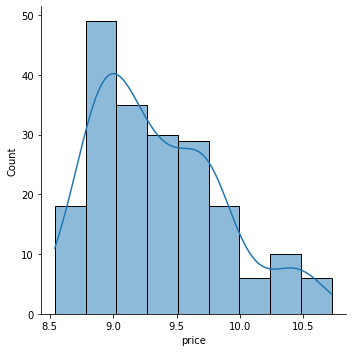

In [9]:
sns.displot(np.log(cars["price"]), kind = "hist", kde = "True")

Our target variable does not seem to be normally distributed. However, for KNN I do not believe that that is required. Anyways, lets do some stats just for fun and see if a log transformation will make it approximately normal.


In [10]:
import scipy

scipy.stats.shapiro(np.log(cars['price'].dropna()).array)

ShapiroResult(statistic=0.9489971399307251, pvalue=1.4320623904495733e-06)

Seems better but it is still not normal according to a shapiro wilk test. The distribution is still right skewed and as a matter of fact the prices almost look bimodal. That could be worth looking into as well. I have a suspicion it has to do to a few luxury brands.


In [11]:
cars[cars['price'] > 25000]['make'].value_counts()

mercedes-benz    8
bmw              3
jaguar           3
porsche          3
Name: make, dtype: int64

In [12]:
cars[cars['price'] < 25000]['make'].value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugot         11
volvo          11
dodge           9
plymouth        7
audi            6
saab            6
bmw             5
chevrolet       3
alfa-romero     3
isuzu           2
renault         2
mercury         1
porsche         1
Name: make, dtype: int64

# Fixing some ordinal variables.
We can reassign some of these variables with data type object into ordinal variables. For example, the number of cylinders can be mapped to numeric as well as the number of doors.



In [13]:
cars.num_of_cylinders.value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: num_of_cylinders, dtype: int64

In [14]:
cylinders_map = {'four': 4, 'six': 6, 'five': 5, 'eight': 8, 'two': 2, 'three': 3, 'twelve': 12}

#The map should also work for number of doors as it only has two or four doors.
cars['num_of_cylinders'] = cars.num_of_cylinders.map(cylinders_map)
cars['num_of_doors'] = cars['num_of_doors'].map(cylinders_map)

# Look at the missing values

Now we're going to take a indepth look at missing values.


In [15]:
def missing(df):
    miss = pd.DataFrame({
        'num_missing_values': df.isnull().sum(),
        'missing_value_ratio': (df.isnull().sum()/df.shape[0]).round(3)
    })
    return miss[miss.num_missing_values > 0].sort_values('num_missing_values', ascending = False)

missing(cars)

,num_missing_values,missing_value_ratio
normalized_losses,41,0.20
bore,4,0.02
stroke,4,0.02
price,4,0.02
num_of_doors,2,0.01
horsepower,2,0.01
peak_rpm,2,0.01


We have a good number of values missing from the normalized_losses column. This column describes the payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year. 

Additionally we have four missing values in the price section. We are trying to train on price so missing this information is unforunate. We will take a quick peek at these and likely remove them unless there is an obvious fix.

In [16]:
cars[cars['price'].isna()]

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_rate,horsepower,peak_rpm,city_mpg,highway_mpg,price
9,0,NaN,audi,gas,turbo,2.0,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,5,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,NaN
44,1,NaN,isuzu,gas,std,2.0,sedan,fwd,front,94.5,155.9,63.6,52.0,1874,ohc,4,90,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
45,0,NaN,isuzu,gas,std,4.0,sedan,fwd,front,94.5,155.9,63.6,52.0,1909,ohc,4,90,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
129,1,NaN,porsche,gas,std,2.0,hatchback,rwd,front,98.4,175.7,72.3,50.5,3366,dohcv,8,203,mpfi,3.94,3.11,10.0,288.0,5750.0,17,28,NaN


In [17]:
cars.dropna(subset = ['price'], axis = 0, inplace = True)

In [18]:
missing(cars)

,num_missing_values,missing_value_ratio
normalized_losses,37,0.184
bore,4,0.020
stroke,4,0.020
num_of_doors,2,0.010
horsepower,2,0.010
peak_rpm,2,0.010


In [19]:
#We can take a look at the normalized losses by make and by body style. If we have not enough info we will
#revert to simply make.
cars.groupby(['make', 'body_style']).normalized_losses.median()

make           body_style 
alfa-romero    convertible      NaN
               hatchback        NaN
audi           sedan          161.0
               wagon            NaN
bmw            sedan          190.0
chevrolet      hatchback      109.5
               sedan           81.0
dodge          hatchback      118.0
               sedan          148.0
               wagon          110.0
honda          hatchback      106.0
               sedan           85.0
               wagon           78.0
isuzu          hatchback        NaN
               sedan            NaN
jaguar         sedan          145.0
mazda          hatchback      129.0
               sedan          115.0
mercedes-benz  convertible    142.0
               hardtop         93.0
               sedan           93.0
               wagon           93.0
mercury        hatchback        NaN
mitsubishi     hatchback      161.0
               sedan          125.0
nissan         hardtop        168.0
               hatchback      194.0
 

In [20]:
#lets fill the missing values that we have by the median normalized losses by make and body style if possible.
cars.normalized_losses.fillna(cars.groupby(['make', 'body_style']).normalized_losses.transform('median'), inplace = True)
cars[cars.normalized_losses.isnull()]

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_rate,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,2.0,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
7,1,NaN,audi,gas,std,4.0,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,5,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0
43,0,NaN,isuzu,gas,std,4.0,sedan,rwd,front,94.3,170.7,61.8,53.5,2337,ohc,4,111,2bbl,3.31,3.23,8.5,78.0,4800.0,24,29,6785.0
46,2,NaN,isuzu,gas,std,2.0,hatchback,rwd,front,96.0,172.6,65.2,51.4,2734,ohc,4,119,spfi,3.43,3.23,9.2,90.0,5000.0,24,29,11048.0
75,1,NaN,mercury,gas,turbo,2.0,hatchback,rwd,front,102.7,178.4,68.0,54.8,2910,ohc,4,140,mpfi,3.78,3.12,8.0,175.0,5000.0,19,24,16503.0
109,0,NaN,peugot,gas,std,4.0,wagon,rwd,front,114.2,198.9,68.4,58.7,3230,l,4,120,mpfi,3.46,3.19,8.4,97.0,5000.0,19,24,12440.0
110,0,NaN,peugot,diesel,turbo,4.0,wagon,rwd,front,114.2,198.9,68.4,58.7,3430,l,4,152,idi,3.70,3.52,21.0,95.0,4150.0,25,25,13860.0
113,0,NaN,peugot,gas,std,4.0,wagon,rwd,front,114.2,198.9,68.4,56.7,3285,l,4,120,mpfi,3.46,2.19,8.4,95.0,5000.0,19,24,16695.0


In [21]:
#we still have 18 missing values, so now will fill by just make.
cars.normalized_losses.fillna(cars.groupby(['make']).normalized_losses.transform('median'), inplace = True)
cars[cars.normalized_losses.isnull()]

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_rate,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,2.0,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
43,0,NaN,isuzu,gas,std,4.0,sedan,rwd,front,94.3,170.7,61.8,53.5,2337,ohc,4,111,2bbl,3.31,3.23,8.5,78.0,4800.0,24,29,6785.0
46,2,NaN,isuzu,gas,std,2.0,hatchback,rwd,front,96.0,172.6,65.2,51.4,2734,ohc,4,119,spfi,3.43,3.23,9.2,90.0,5000.0,24,29,11048.0
75,1,NaN,mercury,gas,turbo,2.0,hatchback,rwd,front,102.7,178.4,68.0,54.8,2910,ohc,4,140,mpfi,3.78,3.12,8.0,175.0,5000.0,19,24,16503.0
130,0,NaN,renault,gas,std,4.0,wagon,fwd,front,96.1,181.5,66.5,55.2,2579,ohc,4,132,mpfi,3.46,3.90,8.7,NaN,NaN,23,31,9295.0
131,2,NaN,renault,gas,std,2.0,hatchback,fwd,front,96.1,176.8,66.6,50.5,2460,ohc,4,132,mpfi,3.46,3.90,8.7,NaN,NaN,23,31,9895.0


We have filled a good number of the normalized losses values. I am a bit skeptical of filling the remaining normalized losses column by just the body style as I believe there are some big differences based off of the make. However lets just let it rip.

In [22]:
cars.normalized_losses.fillna(cars.groupby(['body_style']).normalized_losses.transform('median'), inplace = True)
cars[cars.normalized_losses.isnull()]

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_rate,horsepower,peak_rpm,city_mpg,highway_mpg,price


In [23]:
missing(cars)

,num_missing_values,missing_value_ratio
bore,4,0.02
stroke,4,0.02
num_of_doors,2,0.01
horsepower,2,0.01
peak_rpm,2,0.01


In [24]:
cars[cars['bore'].isna()]

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_rate,horsepower,peak_rpm,city_mpg,highway_mpg,price
55,3,150.0,mazda,gas,std,2.0,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,2,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,10945.0
56,3,150.0,mazda,gas,std,2.0,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,2,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,11845.0
57,3,150.0,mazda,gas,std,2.0,hatchback,rwd,front,95.3,169.0,65.7,49.6,2385,rotor,2,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,13645.0
58,3,150.0,mazda,gas,std,2.0,hatchback,rwd,front,95.3,169.0,65.7,49.6,2500,rotor,2,80,mpfi,NaN,NaN,9.4,135.0,6000.0,16,23,15645.0


In [25]:
#Unfortunately I cannot find any information on these cars via google. So we can try checking stroke by fuel system
#or engine type
#it seems these mazdas are the only 4bbl fuel systems and rotor engines.

cars.groupby(['engine_type']).stroke.median()

engine_type
dohc     3.215
l        3.200
ohc      3.390
ohcf     2.640
ohcv     3.270
rotor      NaN
Name: stroke, dtype: float64

In [27]:
#as bore/stroke may not even be valuable features for estimation. Lets just median impute.
cars.bore.fillna(cars.bore.median(), inplace = True)
cars.stroke.fillna(cars.stroke.median(), inplace = True)

In [28]:
missing(cars)

,num_missing_values,missing_value_ratio
num_of_doors,2,0.01
horsepower,2,0.01
peak_rpm,2,0.01


In [29]:
cars[cars['num_of_doors'].isna()]

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_rate,horsepower,peak_rpm,city_mpg,highway_mpg,price
27,1,148.0,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,157.3,63.8,50.6,2191,ohc,4,98,mpfi,3.03,3.39,7.6,102.0,5500.0,24,30,8558.0
63,0,115.0,mazda,diesel,std,NaN,sedan,fwd,front,98.8,177.8,66.5,55.5,2443,ohc,4,122,idi,3.39,3.39,22.7,64.0,4650.0,36,42,10795.0


In [30]:
cars.num_of_doors.fillna(2, inplace = True)

In [31]:
cars[cars.horsepower.isna()]

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_rate,horsepower,peak_rpm,city_mpg,highway_mpg,price
130,0,90.0,renault,gas,std,4.0,wagon,fwd,front,96.1,181.5,66.5,55.2,2579,ohc,4,132,mpfi,3.46,3.9,8.7,NaN,NaN,23,31,9295.0
131,2,131.5,renault,gas,std,2.0,hatchback,fwd,front,96.1,176.8,66.6,50.5,2460,ohc,4,132,mpfi,3.46,3.9,8.7,NaN,NaN,23,31,9895.0


In [32]:
#I have found both of these renaults online. The first corresponds to the 1985 Renault Sportwagon
#the second is the Renault Fuego. The turbo weighs 2460, while the regular weighs 2580ish. I will assume it is not turbo.
#fortunately they have the same horsepower and peak rpm as they use the same engine.

cars.horsepower.fillna(91,inplace = True)
cars.peak_rpm.fillna(5500, inplace = True)

missing(cars)

,num_missing_values,missing_value_ratio


In [33]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized_losses  201 non-null    float64
 2   make               201 non-null    object 
 3   fuel_type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num_of_doors       201 non-null    float64
 6   body_style         201 non-null    object 
 7   drive_wheels       201 non-null    object 
 8   engine_location    201 non-null    object 
 9   wheel_base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb_weight        201 non-null    int64  
 14  engine_type        201 non-null    object 
 15  num_of_cylinders   201 non-null    int64  
 16  engine_size        201 non

# Normalization or standardization

We have successfully fixed all of the missing values in our dataset. We can now move on to normalization. We will either want to standardize or normalize the columns for the KNN algorithm. 

Standardization is less affected by outliers, however it also prefers if the data is roughly normally distributed.

Normalization has no such restrictions however it can be affected by outliers quite a bit.

In [411]:
#Split the dataset into catagorical and numeric

def feat_type(df):
    num_feats = df.loc[:, df.dtypes != object].columns.tolist()
    cat_feats = df.loc[:, df.dtypes == object].columns.tolist()
    ord_feats =[]
    for feat in num_feats:
        if df[feat].value_counts().size <20:
            ord_feats.append(feat)
        
    num_feats = [x for x in num_feats if x not in ord_feats + ["price"]]
    
    return num_feats, cat_feats, ord_feats

In [412]:
num_feats, cat_feats, ord_feats = feat_type(cars)

In [413]:
num_feats

['normalized_losses',
 'wheel_base',
 'length',
 'width',
 'height',
 'curb_weight',
 'engine_size',
 'bore',
 'stroke',
 'compression_rate',
 'horsepower',
 'peak_rpm',
 'city_mpg',
 'highway_mpg']

In [37]:
cat_feats

['make',
 'fuel_type',
 'aspiration',
 'body_style',
 'drive_wheels',
 'engine_location',
 'engine_type',
 'fuel_system']

In [38]:
ord_feats

['symboling', 'num_of_doors', 'num_of_cylinders']

In [39]:
#We can use a preprocessor from sklearn

from sklearn.preprocessing import RobustScaler
rbsc = RobustScaler()

def prep_data(df, cat_cols, num_cols):
    numeric_std = pd.DataFrame(rbsc.fit_transform(df[num_cols]), columns = df[num_cols].columns)  
    #drop first dummy variable as not needed due to Degrees of freedom
    dummies = pd.get_dummies(df[cat_cols], drop_first = True) 
    numeric_std = numeric_std.reset_index(drop = True)
    
    #Add dummies and drop cat and numeric cols
    data = pd.concat([df, dummies], axis = 1).drop(cat_cols, axis = 1).drop(num_cols, axis = 1)
    #Add numeric cols.
    data = data.reset_index(drop = True)
    data2 = pd.concat([data, numeric_std], axis = 1)
    return data2
   
cars2 = prep_data(cars,cat_feats, num_feats)

# KNN modeling

We have a few things to deal with. The KNearestNeighbors algorithm needs us to pick a variety of features as well as select how many neighbors to use for the prediction.
We need to also split the dataset into training and cross validation sets to check the model accuracy.

In [414]:
cars_num = cars2.copy()
knn_feats = num_feats
knn_feats.append('price')
print(knn_feats)

['normalized_losses', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_size', 'bore', 'stroke', 'compression_rate', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']


In [420]:
#Split the dataset into X the predictors and y the target.
cars_knn = cars_num[knn_feats]

X = cars_knn.drop(labels = 'price', axis = 1)
y = cars_knn['price']


In [117]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

In [118]:
kf = KFold(n_splits = 10, shuffle = True, random_state = 0)

In [272]:
#Set up a basic KNN
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 5)

In [421]:
#The below algorithm will already split into train and test. However, we want to only run the SBS on the train set
#If we run it on our total set we will be unable to cross validate the conclusions on the test set and our test set
#Will become part of our algorithm
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [422]:

from sklearn.base import clone
from itertools import combinations
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import numpy as np



class SBS():
    def __init__(self, estimator, k_features, scoring=mean_squared_error,
                 test_size=0.3, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=self.test_size,
                             random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, 
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train, 
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:,indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

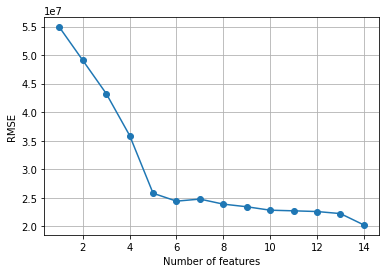

In [423]:
#Lets run the model through SBS
sbs = SBS(knn, k_features= 1)
sbs.fit(X_train.to_numpy(), y_train.to_numpy())

k_feat = [len(k) for k in sbs.subsets_]

rmses = np.sqrt(sbs.scores_)


plt.plot(k_feat, sbs.scores_, marker ='o')
plt.ylim()
plt.ylabel("RMSE")
plt.xlabel('Number of features')
plt.grid()
plt.show()



The RMSE continuously gets better. I will check 

In [432]:
k5 = list(sbs.subsets_[9])
len(k5)

5

In [433]:
knn2 = KNeighborsRegressor(n_neighbors = 5)
knn2.fit(X_train.iloc[:,k5], y_train)

mses_train= cross_val_score(estimator = knn2, X = X_train.iloc[:,k5],
                      y = y_train, scoring = 'neg_mean_squared_error',
                      cv = kf)
avg_rmse_train = np.sqrt(np.abs(mses_train)).mean()

mses_cv= cross_val_score(estimator = knn2, X = X_cv.iloc[:,k5],
                      y = y_cv, scoring = 'neg_mean_squared_error',
                      cv = kf)
avg_rmse_cv = np.sqrt(np.abs(mses_cv)).mean()

print("Training RMSE KNN w/ Feature Selection:", avg_rmse_train)
print("Cross Validation RMSE w/ Feature Selection:", avg_rmse_cv)

print("Training accuracy KNN w/ Feature Selection:", knn2.score(X_train.iloc[:,k5], y_train))
print("Cross Validation accuracy w/ Feature Selection:", knn2.score(X_cv.iloc[:,k5], y_cv))

Training RMSE KNN w/ Feature Selection: 5571.355615426476
Cross Validation RMSE w/ Feature Selection: 8379.818206434999
Training accuracy KNN w/ Feature Selection: 0.649213477098896
Cross Validation accuracy w/ Feature Selection: 0.4051703937816641


In [434]:
knn2.score(X_train.iloc[:,k5], y_train)

0.649213477098896

In [435]:
k10 = list(sbs.subsets_[4])
len(k10)

10

In [436]:
knn2 = KNeighborsRegressor(n_neighbors = 5)
knn2.fit(X_train.iloc[:,k10], y_train)

mses_train= cross_val_score(estimator = knn2, X = X_train.iloc[:,k10],
                      y = y_train, scoring = 'neg_mean_squared_error',
                      cv = kf)
avg_rmse_train = np.sqrt(np.abs(mses_train)).mean()

mses_cv= cross_val_score(estimator = knn2, X = X_cv.iloc[:,k10],
                      y = y_cv, scoring = 'neg_mean_squared_error',
                      cv = kf)
avg_rmse_cv = np.sqrt(np.abs(mses_cv)).mean()

print("Training RMSE KNN w/ Feature Selection:", avg_rmse_train)
print("Cross Validation RMSE w/ Feature Selection:", avg_rmse_cv)

print("Training accuracy KNN w/ Feature Selection:", knn2.score(X_train.iloc[:,k10], y_train))
print("Cross Validation accuracy w/ Feature Selection:", knn2.score(X_cv.iloc[:,k10], y_cv))

Training RMSE KNN w/ Feature Selection: 4403.946903927682
Cross Validation RMSE w/ Feature Selection: 7292.824730486194
Training accuracy KNN w/ Feature Selection: 0.8146885838052548
Cross Validation accuracy w/ Feature Selection: 0.7293672938619111


In [1]:
# k5 = list(sbs.subsets_[51])
# len(k5)

In [371]:
# knn2 = KNeighborsRegressor(n_neighbors = 5)
# knn2.fit(X_train.iloc[:,k5], y_train)


# mses_train= cross_val_score(estimator = knn2, X = X_train.iloc[:,k5],
#                       y = y_train, scoring = 'neg_mean_squared_error',
#                       cv = kf)
# avg_rmse_train = np.sqrt(np.abs(mses_train)).mean()

# mses_cv= cross_val_score(estimator = knn2, X = X_cv.iloc[:,k5],
#                       y = y_cv, scoring = 'neg_mean_squared_error',
#                       cv = kf)
# avg_rmse_cv = np.sqrt(np.abs(mses_cv)).mean()

# print("Training RMSE KNN w/ Feature Selection:", avg_rmse_train)
# print("Cross Validation RMSE w/ Feature Selection:", avg_rmse_cv)

# print("Training accuracy KNN w/ Feature Selection:", knn2.score(X_train.iloc[:,k5], y_train))
# print("Cross Validation accuracy w/ Feature Selection:", knn2.score(X_cv.iloc[:,k5], y_cv))

Training RMSE KNN w/ Feature Selection: 6477.082782069687
Cross Validation RMSE w/ Feature Selection: 9464.271522487432
Training accuracy KNN w/ Feature Selection: 0.5195713088452623
Cross Validation accuracy w/ Feature Selection: 0.11534885671298911


We have a variety of features we can use to now check for the hyperparameter tuning.
### Hyperparameter Tuning

In [444]:
num_folds = [3, 5, 7, 9, 10, 11, 13, 15, 17, 19, 21, 23]
feat_lists = [k5,k10]
rmse_list_list = []
rmse_sdev_list = []

model_dict = {}

for fold in num_folds:
    kf = KFold(fold, shuffle=True, random_state=1)
    model = KNeighborsClassifier()
    rmse_list = []
    rmse_sdev = []
    feat_dict = {}
    f = 5
    for feats in feat_lists:
        neighbor_dict = {}
        for n in range(2,10):
            #Fit model for KNN
            knn2 = KNeighborsRegressor(n_neighbors = n)
            knn2.fit(X_train.iloc[:,feats], y_train)
            #get the scores
            mses = cross_val_score(estimator = knn2, X = X_cv.iloc[:,feats],
                              y = y_cv, scoring = 'neg_mean_squared_error',
                              cv = kf)
            rmses = np.sqrt(np.absolute(mses))
            avg_rmse = np.mean(rmses)
            rmse_list.append(avg_rmse)
            std_rmse = np.std(rmses)
            rmse_sdev.append(std_rmse)
            neighbor_dict[n] = avg_rmse
            print(str(n), "neighbors:", str(fold), "folds: ", "avg RMSE: ", str(avg_rmse), "std RMSE: ", str(std_rmse),
                  "accuracy", knn2.score(X_cv.iloc[:,feats], y_cv) )
            
        rmse_list_list.append(rmse_list)
        rmse_sdev_list.append(rmse_sdev)
        
        feat_dict[f] = neighbor_dict
        f += 5
        
        
    model_dict[fold] = feat_dict
    

    

2 neighbors: 3 folds:  avg RMSE:  9685.38481569139 std RMSE:  1959.4799471163544 accuracy 0.4641464983926916
3 neighbors: 3 folds:  avg RMSE:  9304.9410811024 std RMSE:  2247.456506707976 accuracy 0.43264933252365523
4 neighbors: 3 folds:  avg RMSE:  8560.744419260247 std RMSE:  3011.8280288081405 accuracy 0.44011485285553364
5 neighbors: 3 folds:  avg RMSE:  8379.818206434999 std RMSE:  3185.5495755792385 accuracy 0.4051703937816641
6 neighbors: 3 folds:  avg RMSE:  8481.373984414768 std RMSE:  3256.7656690318927 accuracy 0.3770347268643509
7 neighbors: 3 folds:  avg RMSE:  8577.758113228103 std RMSE:  3380.9034564035796 accuracy 0.3443500842150181
8 neighbors: 3 folds:  avg RMSE:  8597.207949688674 std RMSE:  3380.492437128268 accuracy 0.3081808367950326
9 neighbors: 3 folds:  avg RMSE:  8703.832294819444 std RMSE:  3362.43357623032 accuracy 0.27528205240819403
2 neighbors: 3 folds:  avg RMSE:  7062.1716353638085 std RMSE:  2652.5648859236994 accuracy 0.8628721948861537
3 neighbors: 

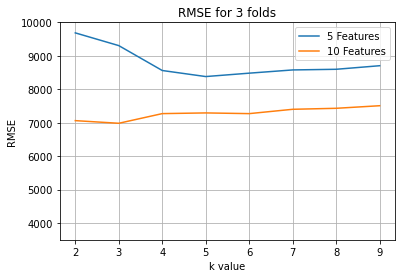

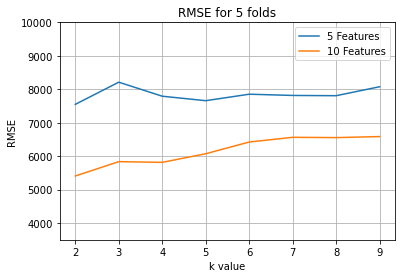

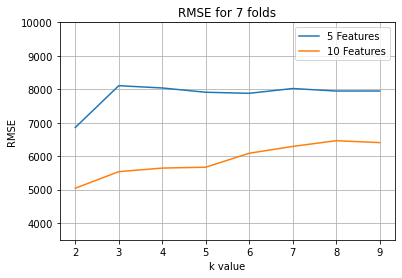

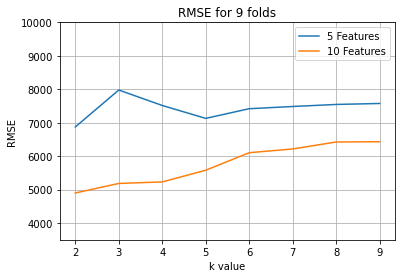

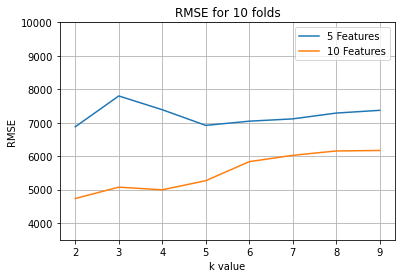

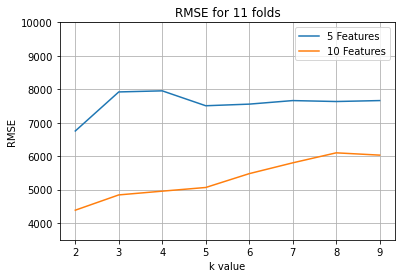

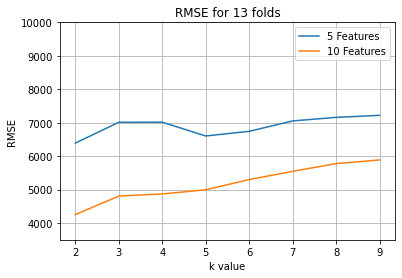

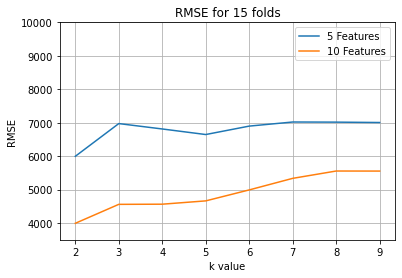

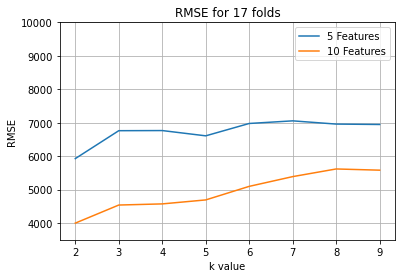

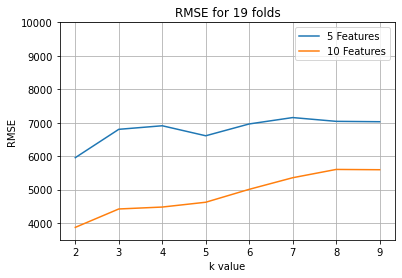

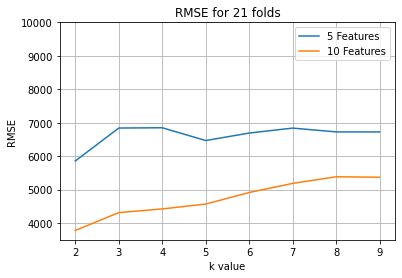

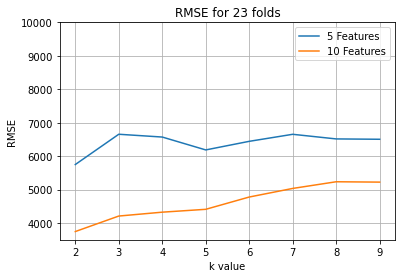

In [478]:
for key in model_dict:
    plt.figure()
    for k,v in model_dict[key].items():
        x = list(v.keys())
        y = list(v.values()) 
        plt.plot(x,y)
    plt.legend(["5 Features","10 Features"])
    plt.title("RMSE for {} folds".format(key))
    plt.xlabel('k value')
    plt.ylabel('RMSE')
    plt.ylim(3500,10000)
    plt.grid()
    
    

# Conclusions

The highest accuracy model used 10 of the 14 available features and around 23 folds for our k_folds cross validation and using 2 of the nearest neighbors to estimate. This model
allows a fairly high level of variation while still generalizing decently well. The model seems to be an ok fit.
